#### This file is to serve as a data cleaning file so we can all be working on the same data for the project! It will import the original data file with the facial recognition data and clean it to be used for a classification model for analysis.

#### Author: Aidan Kleinman
#### Date: Feb. 7th, 2026

In [1]:
#Code Block 1
## import libraries

import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Code Block 2
## load the data
train_data = pd.read_csv('../../Data/fairface_label_train.csv')
val_data = pd.read_csv('../../Data/fairface_label_val.csv')

In [3]:
#Code Block 3
## view the training data

display(train_data.head())
train_data.info()

,file,age,gender,race,service_test
0,train/1.jpg,50-59,Male,East Asian,True
1,train/2.jpg,30-39,Female,Indian,False
2,train/3.jpg,3-9,Female,Black,False
3,train/4.jpg,20-29,Female,Indian,True
4,train/5.jpg,20-29,Female,Indian,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86744 entries, 0 to 86743
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          86744 non-null  object
 1   age           86744 non-null  object
 2   gender        86744 non-null  object
 3   race          86744 non-null  object
 4   service_test  86744 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 2.7+ MB


In [4]:
#Code Block 4
## view the validation data

display(val_data.head())
val_data.info()

,file,age,gender,race,service_test
0,val/1.jpg,3-9,Male,East Asian,False
1,val/2.jpg,50-59,Female,East Asian,True
2,val/3.jpg,30-39,Male,White,True
3,val/4.jpg,20-29,Female,Latino_Hispanic,True
4,val/5.jpg,20-29,Male,Southeast Asian,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   file          10954 non-null  object
 1   age           10954 non-null  object
 2   gender        10954 non-null  object
 3   race          10954 non-null  object
 4   service_test  10954 non-null  bool  
dtypes: bool(1), object(4)
memory usage: 353.1+ KB


In [5]:
#Code Block 5
## remove the service_test column

train_data.drop(columns=['service_test'], inplace=True)
val_data.drop(columns=['service_test'], inplace=True)

display(train_data.info())
display(val_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86744 entries, 0 to 86743
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    86744 non-null  object
 1   age     86744 non-null  object
 2   gender  86744 non-null  object
 3   race    86744 non-null  object
dtypes: object(4)
memory usage: 2.6+ MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10954 entries, 0 to 10953
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   file    10954 non-null  object
 1   age     10954 non-null  object
 2   gender  10954 non-null  object
 3   race    10954 non-null  object
dtypes: object(4)
memory usage: 342.4+ KB


None

In [6]:
#Code Block 6
## check for missing values

print("Missing values in training data:")
print(train_data.isnull().sum())

print("\nMissing values in validation data:")
print(val_data.isnull().sum())

Missing values in training data:
file      0
age       0
gender    0
race      0
dtype: int64

Missing values in validation data:
file      0
age       0
gender    0
race      0
dtype: int64


In [7]:
#Code Block 7
## check for duplicates

print("Duplicate rows in training data:", train_data.duplicated().sum())
print("Duplicate rows in validation data:", val_data.duplicated().sum())

Duplicate rows in training data: 0
Duplicate rows in validation data: 0


In [8]:
#Code Block 8
## standardize the gender and race columns

display(train_data['gender'].head())

train_data["gender"] = train_data["gender"].str.lower().str.strip()
val_data["gender"] = val_data["gender"].str.lower().str.strip()

train_data['gender'].head()

0      Male
1    Female
2    Female
3    Female
4    Female
Name: gender, dtype: object

0      male
1    female
2    female
3    female
4    female
Name: gender, dtype: object

In [9]:
#Code Block 9

train_data["race"] = train_data["race"].str.lower().str.strip()
val_data["race"] = val_data["race"].str.lower().str.strip()

train_data['race'].head()

0    east asian
1        indian
2         black
3        indian
4        indian
Name: race, dtype: object

In [10]:
#Code Block 10
## check raw and normalized class imbalance
print("Raw class imbalance for gender:\n")
display(train_data['gender'].value_counts())

print("\nNormalized class imbalance for gender:\n")
display(train_data['gender'].value_counts(normalize=True))

Raw class imbalance for gender:



gender
male      45986
female    40758
Name: count, dtype: int64


Normalized class imbalance for gender:



gender
male      0.530135
female    0.469865
Name: proportion, dtype: float64

In [11]:
#Code Block 11
## check raw and normalized class imbalance for race

print("Raw class imbalance for race:\n")
display(train_data['race'].value_counts())

print("\nNormalized class imbalance for race:\n")
display(train_data['race'].value_counts(normalize=True))

Raw class imbalance for race:



race
white              16527
latino_hispanic    13367
indian             12319
east asian         12287
black              12233
southeast asian    10795
middle eastern      9216
Name: count, dtype: int64


Normalized class imbalance for race:



race
white              0.190526
latino_hispanic    0.154097
indian             0.142016
east asian         0.141647
black              0.141024
southeast asian    0.124447
middle eastern     0.106244
Name: proportion, dtype: float64

In [13]:
#Code Block 12
## race gender imbalence

race_gender_ct = pd.crosstab(
    train_data['race'],
    train_data['gender'],
    normalize = 'index'
)

race_gender_ct

gender,female,male
race,,
black,0.501676,0.498324
east asian,0.499797,0.500203
indian,0.479666,0.520334
latino_hispanic,0.502357,0.497643
middle eastern,0.308919,0.691081
southeast asian,0.480130,0.519870
white,0.473528,0.526472


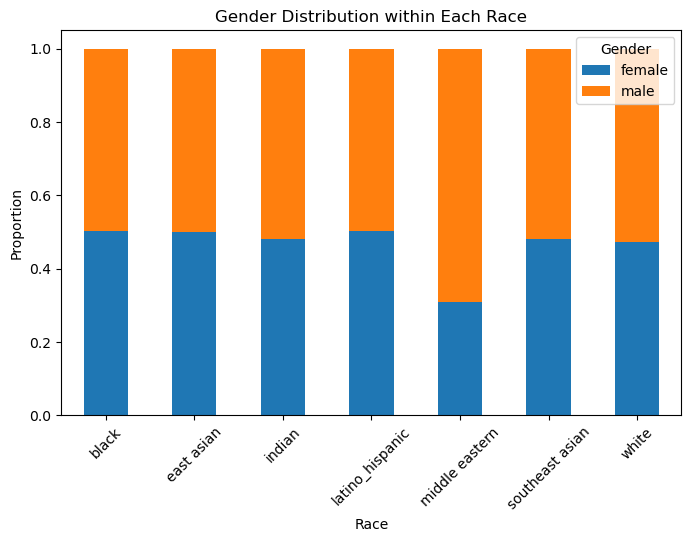

In [14]:
#Code Block 13
## visualization of race_gender

race_gender_ct.plot(kind='bar',
                    stacked = True,
                    figsize = (8,5))

plt.title('Gender Distribution within Each Race')
plt.ylabel('Proportion')
plt.xlabel('Race')
plt.legend(title = 'Gender')
plt.xticks(rotation = 45)
plt.show()

In [16]:
#Code Block 14
## underrepresentation

overall_gender_dist = train_data["gender"].value_counts(normalize=True)
race_gender_diff = race_gender_ct.sub(overall_gender_dist, axis=1)
race_gender_diff

gender,female,male
race,,
black,0.031810,-0.031810
east asian,0.029931,-0.029931
indian,0.009800,-0.009800
latino_hispanic,0.032491,-0.032491
middle eastern,-0.160946,0.160946
southeast asian,0.010264,-0.010264
white,0.003663,-0.003663


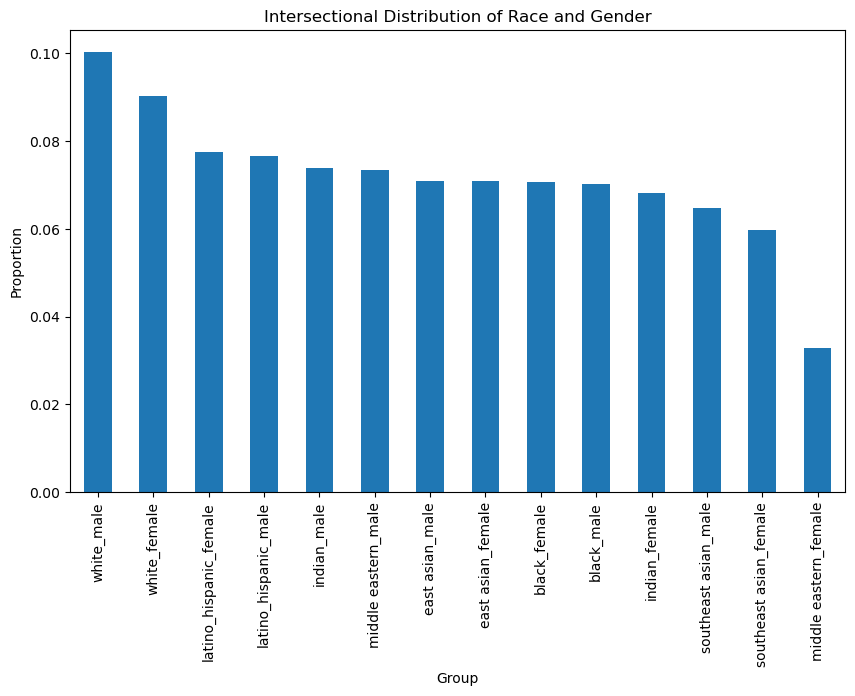

In [17]:
#Code Block 15
## intersectional counts

train_data['race_gender'] = train_data['race'] + '_' + train_data['gender']
val_data['race_gender'] = val_data['race'] + '_' + val_data['gender']

intersection_counts = train_data['race_gender'].value_counts(normalize = True)
intersection_counts.plot(kind = 'bar', figsize=(10,6))
plt.title('Intersectional Distribution of Race and Gender')
plt.ylabel('Proportion')
plt.xlabel('Group')
plt.xticks(rotation = 90)
plt.show()